### The Show ###

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv(r"C:\\Users\\jamia\MSDS 455\\The Show\\combined_excel2.csv")

C:\Users\jamia\AppData\Local\Temp\ipykernel_15756\3770464591.py:1: DtypeWarning: Columns (18,24,25,26,129,154,192,198,199,200,326,351) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\\Users\\jamia\MSDS 455\\The Show\\combined_excel2.csv")


In [8]:
missing = data.isnull().sum()
print(missing)

id                         2820
sex                        2820
age                        2820
recall_n                   2820
recall_d                 173970
                          ...  
recum_length.1           173056
recum_length_method.1    173056
bmi_chld.1               171111
psu.1                    165464
stratum.1                165464
Length: 371, dtype: int64


In [9]:
print(data.head())

        id  sex   age  recall_n  recall_d  recall_m  recall_y  weekday  \
0  83732.0  1.0  62.0       1.0       NaN       NaN       NaN      7.0   
1  83732.0  1.0  62.0       1.0       NaN       NaN       NaN      7.0   
2  83732.0  1.0  62.0       1.0       NaN       NaN       NaN      7.0   
3  83732.0  1.0  62.0       1.0       NaN       NaN       NaN      7.0   
4  83732.0  1.0  62.0       1.0       NaN       NaN       NaN      7.0   

   respondent  us_intake  ...  marital_status.1  hh_size.1  fam_size.1  \
0         1.0        0.0  ...               1.0        2.0         2.0   
1         1.0        0.0  ...               3.0        1.0         1.0   
2         1.0        0.0  ...               1.0        2.0         2.0   
3         1.0        0.0  ...               6.0        1.0         1.0   
4         1.0        0.0  ...               3.0        5.0         5.0   

   hh_income.1  fam_income.1  recum_length.1  recum_length_method.1  \
0         10.0          10.0           

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173970 entries, 0 to 173969
Columns: 371 entries, id to stratum.1
dtypes: float64(351), int64(4), object(16)
memory usage: 492.4+ MB


C:\Users\jamia\AppData\Local\Temp\ipykernel_15756\909748825.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  respondents_bmi_over_25_vitc_fiber = respondents_bmi_over_25[vitc_filter & fiber_filter]


Text(0.5, -0.1, 'Data Source: NHANES 2015-2016 CDC Survey')

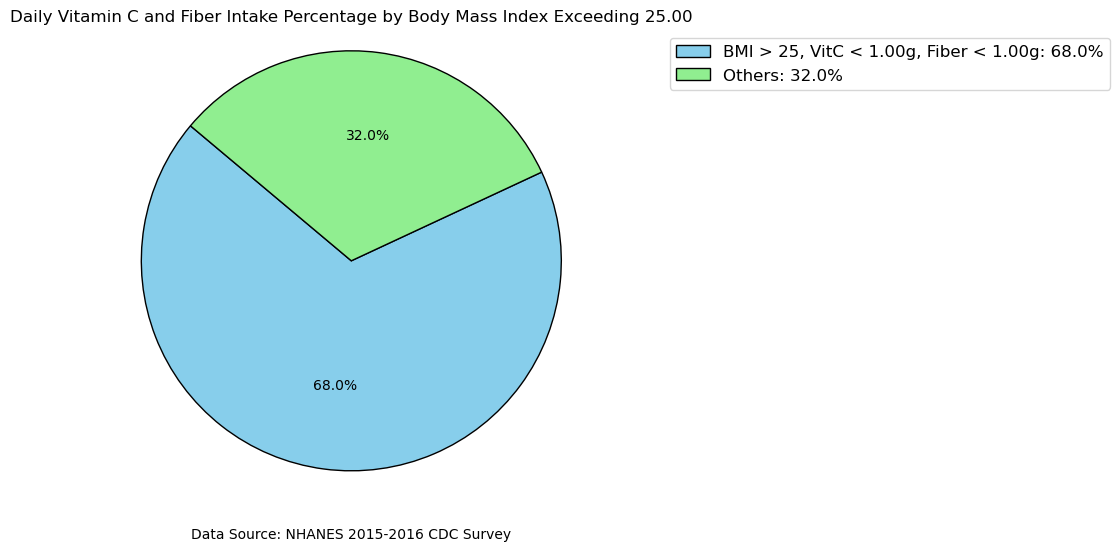

In [33]:
import matplotlib.pyplot as plt

#filter bmi
bmi_over_25_filter = data['bmi_adults'] > 25.00
vitc_filter = data['vitc'] < 1.00
fiber_filter = data['fiber'] < 1.00

respondents_bmi_over_25 = data[bmi_over_25_filter]

respondents_bmi_over_25_vitc_fiber = respondents_bmi_over_25[vitc_filter & fiber_filter]

respondents_bmi_over_25_count = len(respondents_bmi_over_25)
respondents_bmi_over_25_vitc_fiber_count = len(respondents_bmi_over_25_vitc_fiber)
respondents_bmi_over_25_others_count = respondents_bmi_over_25_count - respondents_bmi_over_25_vitc_fiber_count

labels = ['BMI > 25, VitC < 1.00g, Fiber < 1.00g', 'Others']
sizes = [respondents_bmi_over_25_vitc_fiber_count, respondents_bmi_over_25_others_count]
colors = ['#87CEEB', '#90EE90']

percentages = [respondents_bmi_over_25_vitc_fiber_count / respondents_bmi_over_25_count * 100,
               respondents_bmi_over_25_others_count / respondents_bmi_over_25_count * 100]

#pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, startangle=140, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'black'})

legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(labels, percentages)]
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.title('Daily Vitamin C and Fiber Intake Percentage by Body Mass Index Exceeding 25.00')
plt.axis('equal')  # Ensures pie is draw

#data source
plt.annotate('Data Source: NHANES 2015-2016 CDC Survey',
             xy=(0.5, -0.1), xycoords='axes fraction',
             ha='center', fontsize=10, color='black')


C:\Users\jamia\AppData\Local\Temp\ipykernel_15756\3468754775.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_energy = data.groupby('mufa_category')['energy'].mean().reset_index()
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


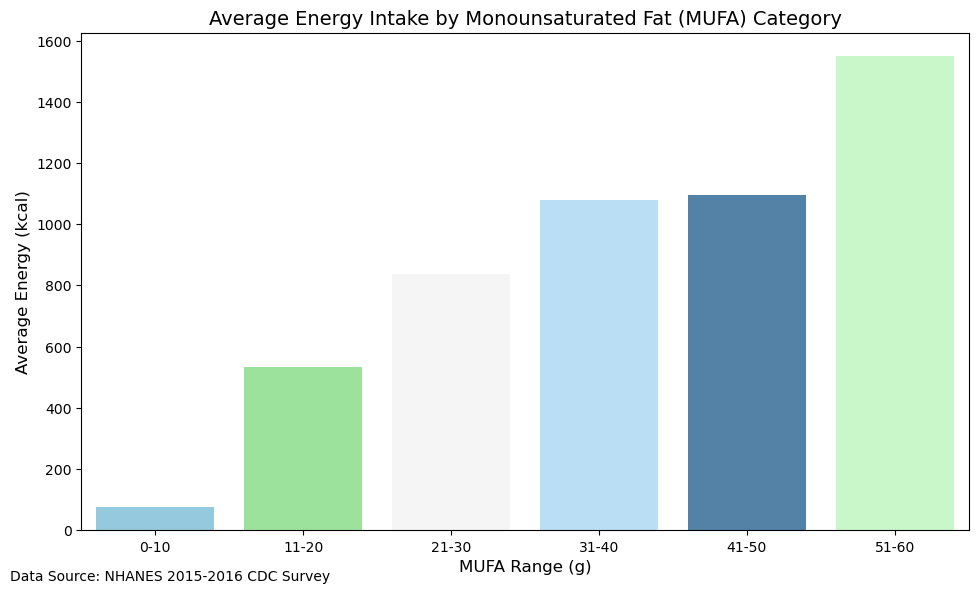

In [78]:
mufa_bins = [0, 10, 20, 30, 40, 50, 60]
mufa_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60']

data['mufa_category'] = pd.cut(data['mufa'], bins=mufa_bins, labels=mufa_labels, right=False)

avg_energy = data.groupby('mufa_category')['energy'].mean().reset_index()

#colors
custom_colors = ["#87CEEB", "#90EE90", "#F5F5F5", "#B0E2FF", "#4682B4", "#C1FFC1"]

plt.figure(figsize=(10, 6))
sns.barplot(x='mufa_category', y='energy', data=avg_energy, palette=custom_colors)

plt.title('Average Energy Intake by Monounsaturated Fat (MUFA) Category', fontsize=14)
plt.xlabel('MUFA Range (g)', fontsize=12)
plt.ylabel('Average Energy (kcal)', fontsize=12)

plt.annotate('Data Source: NHANES 2015-2016 CDC Survey',
             xy=(0.1, -0.1), xycoords='axes fraction',
             ha='center', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()

